In [192]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [193]:
# file path variables
pitching_data = '../Data/Pitching_Data.csv'
hitting_data = '../Data/Hitting_Data.csv'

In [194]:
# read csv
pitching_data_df = pd.read_csv(pitching_data, encoding="ISO-8859-1")
hitting_data_df = pd.read_csv(hitting_data, encoding="ISO-8859-1")

In [195]:
pitching_data_df.head()

,Year,Team,W,L,ERA,Hits Allowed,SO,Champion
0,2019,Dodgers,106,56,3.39,1201,1519,0
1,2019,Astros,107,55,3.66,1205,1671,0
2,2019,Rays,96,66,3.67,1274,1621,0
3,2019,Indians,93,69,3.79,1308,1508,0
4,2019,Cardinals,91,71,3.82,1284,1399,0


In [196]:
hitting_data_df.head()

,Year,Team,HR,SO,AVG
0,2019,Astros,288,1166,0.274
1,2019,Twins,307,1334,0.270
2,2019,Red Sox,245,1382,0.250
3,2019,Yankees,306,1437,0.240
4,2019,Rockies,224,1503,0.250


In [197]:
world_series_df.head()

,Year,Team,Champion
0,2019,Washington Nationals,1
1,2018,Boston Red Sox,1
2,2017,Houston Astros,1
3,2016,Chicago Cubs,1
4,2015,Kansas City Royals,1


In [198]:
df_all = pitching_data_df.merge(hitting_data_df, on=['Year','Team'], how='left', suffixes=('_pitching', '_batting'))

In [199]:
df_all.head()

,Year,Team,W,L,ERA,Hits Allowed,SO_pitching,Champion,HR,SO_batting,AVG
0,2019,Dodgers,106,56,3.39,1201,1519,0,279,1356,0.250
1,2019,Astros,107,55,3.66,1205,1671,0,288,1166,0.274
2,2019,Rays,96,66,3.67,1274,1621,0,217,1493,0.240
3,2019,Indians,93,69,3.79,1308,1508,0,223,1332,0.270
4,2019,Cardinals,91,71,3.82,1284,1399,0,210,1420,0.270


In [200]:
label_encoder = LabelEncoder()
label_encoder.fit(df_all["Team"])
label_encoder.classes_

array(['Angels', 'Astros', 'Athletics', 'Blue Jays', 'Braves', 'Brewers',
       'Cardinals', 'Cubs', 'Diamondbacks', 'Dodgers', 'Giants',
       'Indians', 'Mariners', 'Marlins', 'Mets', 'Nationals', 'Orioles',
       'Padres', 'Phillies', 'Pirates', 'Rangers', 'Rays', 'Red Sox',
       'Reds', 'Rockies', 'Royals', 'Tigers', 'Twins', 'White Sox',
       'Yankees'], dtype=object)

In [201]:
team_id = label_encoder.transform(df_all.Team)

In [202]:
team_id

array([ 9,  1, 21, 11,  6,  2,  7, 23, 27,  4,  8, 14, 15, 29, 10,  5, 18,
       17, 22, 13,  3, 28, 12, 20,  0, 19, 25, 26, 24, 16,  1,  9,  7,  8,
        5, 21,  4, 22, 11, 29,  2,  6, 10, 19, 15, 14, 12, 18,  0, 24, 17,
       27, 26, 23, 13, 28,  3, 20, 25, 16, 11,  9,  8, 22, 29, 15,  7, 21,
        5,  6,  1,  0, 19,  3, 12, 10, 24, 18, 27, 25,  2, 17, 20,  4, 28,
       13, 16, 14, 23, 26,  7, 15, 14, 10,  9,  3, 11, 12, 22, 13,  1,  6,
        5, 28, 29, 21, 25, 16, 19, 26,  0, 20, 17,  4,  2, 18, 23, 24, 27,
        8,  6, 19,  7, 14,  9,  1, 15, 11, 10, 25, 21,  3,  0, 28, 29, 13,
        8, 16, 27, 17,  2, 12, 20,  5, 22, 23,  4, 26, 18, 24, 15, 12,  2,
       17,  4,  9, 16, 19, 14, 10,  6, 25, 21, 11,  0, 23,  5, 29, 13, 18,
        7,  3, 22, 26,  1,  8, 28, 20, 27, 24,  4,  9, 19, 23,  6, 25,  2,
       15, 26, 20, 13, 21, 14, 22, 11,  5,  8, 29, 17, 28,  7, 10, 16,  0,
        3, 12, 18, 24, 27,  1, 21, 15, 23,  9,  4,  2, 10,  6, 12, 26, 29,
       18, 16, 19,  8, 17

In [203]:
df_all['Team ID'] = team_id

In [204]:
df_all.head()

,Year,Team,W,L,ERA,Hits Allowed,SO_pitching,Champion,HR,SO_batting,AVG,Team ID
0,2019,Dodgers,106,56,3.39,1201,1519,0,279,1356,0.250,9
1,2019,Astros,107,55,3.66,1205,1671,0,288,1166,0.274,1
2,2019,Rays,96,66,3.67,1274,1621,0,217,1493,0.240,21
3,2019,Indians,93,69,3.79,1308,1508,0,223,1332,0.270,11
4,2019,Cardinals,91,71,3.82,1284,1399,0,210,1420,0.270,6


In [243]:
label_encoder.inverse_transform(df_all['Team ID'])

array(['Dodgers', 'Astros', 'Rays', 'Indians', 'Cardinals', 'Athletics',
       'Cubs', 'Reds', 'Twins', 'Braves', 'Diamondbacks', 'Mets',
       'Nationals', 'Yankees', 'Giants', 'Brewers', 'Phillies', 'Padres',
       'Red Sox', 'Marlins', 'Blue Jays', 'White Sox', 'Mariners',
       'Rangers', 'Angels', 'Pirates', 'Royals', 'Tigers', 'Rockies',
       'Orioles', 'Astros', 'Dodgers', 'Cubs', 'Diamondbacks', 'Brewers',
       'Rays', 'Braves', 'Red Sox', 'Indians', 'Yankees', 'Athletics',
       'Cardinals', 'Giants', 'Pirates', 'Nationals', 'Mets', 'Mariners',
       'Phillies', 'Angels', 'Rockies', 'Padres', 'Twins', 'Tigers',
       'Reds', 'Marlins', 'White Sox', 'Blue Jays', 'Rangers', 'Royals',
       'Orioles', 'Indians', 'Dodgers', 'Diamondbacks', 'Red Sox',
       'Yankees', 'Nationals', 'Cubs', 'Rays', 'Brewers', 'Cardinals',
       'Astros', 'Angels', 'Pirates', 'Blue Jays', 'Mariners', 'Giants',
       'Rockies', 'Phillies', 'Twins', 'Royals', 'Athletics', 'Padres',
      

In [255]:
X = df_all[["ERA", "HR"]]
y = df_all["W"].values.reshape(-1, 1)
print(X.shape, y.shape)

(300, 2) (300, 1)


In [256]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [257]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [275]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

a_score = model.score(X, y)
print(f"Overall Score: {a_score}")

model.predict(X)

Training Score: 0.7540953375482264
Testing Score: 0.7248942596255314
Overall Score: 0.7464370924079533


array([109.13026433, 105.52803667,  94.86432145,  93.55857342,
        91.09163163,  95.29047686,  92.76875884,  87.02676651,
        98.83644806,  89.90918325,  84.71505946,  87.96272188,
        85.79102213,  96.31473005,  74.51704844,  86.40434735,
        78.86351468,  77.6277703 ,  80.18755688,  64.84258458,
        78.83919331,  67.0523529 ,  73.8231454 ,  69.81760347,
        68.82687188,  59.13411386,  58.80386999,  55.78905966,
        61.01670505,  57.74926823, 103.31974858, 102.45231664,
        87.84851618,  87.71612258,  93.9162054 ,  83.51273039,
        87.20325587,  92.07474951,  92.89047198, 100.23652112,
        93.60118896,  89.805658  ,  77.35071615,  79.98050638,
        84.26912966,  80.62121971,  80.41120876,  81.52217326,
        85.6555618 ,  81.7778665 ,  73.2310748 ,  72.17795327,
        65.77547321,  70.3243367 ,  61.82016054,  68.14808998,
        73.31482566,  68.64118229,  62.336094  ,  62.82463934,
       100.88326165, 100.75086806,  95.30718451,  86.53

Text(0.5, 1.0, 'Residual Plot')

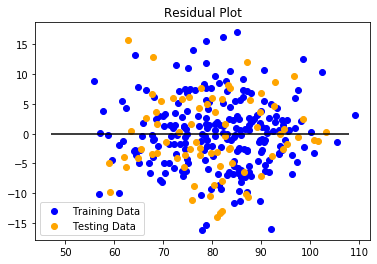

In [259]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END 

In [269]:
#y_train = y_train.reshape(-1, 1)
y_train = y_train.ravel()

In [270]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train )
rf.score(X_train, y_train)

0.9911111111111112

In [276]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X, y)
rf.score(X, y)

C:\Users\esjos\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.99